In [1]:
from osgeo import gdal
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

In [5]:
# define path to data dir
feature_dir   = pathlib.Path('/media/Data/FYS_3023/Sentinel-1/features').absolute()

# select S1 product
S1_base = 'S1A_EW_GRDM_1SDH_20240729T175706_20240729T175756_054979_06B293_FD70'

In [6]:
# build path to intensity imaage files
HH_path    = feature_dir / S1_base / 'Sigma0_HH.img'
HV_path    = feature_dir / S1_base / 'Sigma0_HV.img'

In [7]:
# read intensities
HH = gdal.Open(HH_path.as_posix()).ReadAsArray()
HV = gdal.Open(HV_path.as_posix()).ReadAsArray()

In [8]:
# multi-looking
window = 5
kernel = np.ones((window,window)) / (window**2)
HH_ML = convolve2d(HH, kernel, mode='same')
HV_ML = convolve2d(HV, kernel, mode='same')

In [9]:
# dB conversion
HH_dB    = 10*np.log10(HH)
HV_dB    = 10*np.log10(HV)
HH_ML_dB = 10*np.log10(HH_ML)
HV_ML_dB = 10*np.log10(HV_ML)

/tmp/ipykernel_24247/2269560567.py:2: RuntimeWarning: divide by zero encountered in log10
  HH_dB    = 10*np.log10(HH)
/tmp/ipykernel_24247/2269560567.py:3: RuntimeWarning: divide by zero encountered in log10
  HV_dB    = 10*np.log10(HV)
/tmp/ipykernel_24247/2269560567.py:4: RuntimeWarning: divide by zero encountered in log10
  HH_ML_dB = 10*np.log10(HH_ML)
/tmp/ipykernel_24247/2269560567.py:5: RuntimeWarning: divide by zero encountered in log10
  HV_ML_dB = 10*np.log10(HV_ML)


In [10]:
# set parameters for visualization
HH_min = -30
HH_max = 0
HV_min = -35
HV_max = -5
step = 1

Text(0.5, 1.0, 'HV, ML5x5')

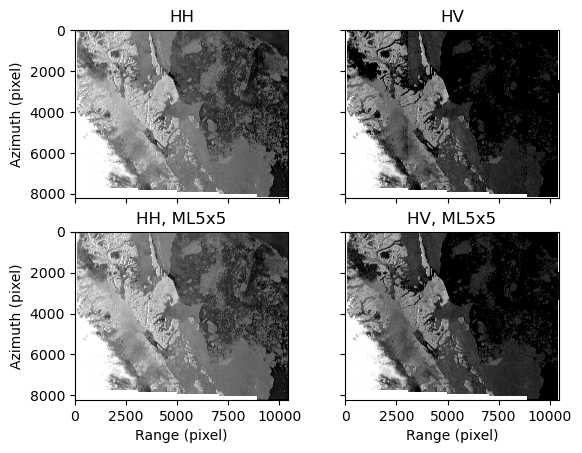

In [11]:
# display
fig, axes = plt.subplots(2,2,sharex=True,sharey=True)
axes = axes.ravel()
axes[0].imshow(HH_dB[::step,::step], cmap='gray', vmin=HH_min, vmax=HH_max)
axes[1].imshow(HV_dB[::step,::step], cmap='gray', vmin=HV_min, vmax=HV_max)
axes[2].imshow(HH_ML_dB[::step,::step], cmap='gray', vmin=HH_min, vmax=HH_max)
axes[3].imshow(HV_ML_dB[::step,::step], cmap='gray', vmin=HV_min, vmax=HV_max)
axes[0].set_ylabel('Azimuth (pixel)')
axes[2].set_ylabel('Azimuth (pixel)')
axes[2].set_xlabel('Range (pixel)')
axes[3].set_xlabel('Range (pixel)')
axes[0].set_title('HH')
axes[1].set_title('HV')
axes[2].set_title(f'HH, ML{window}x{window}')
axes[3].set_title(f'HV, ML{window}x{window}')

In [12]:
# define homogeneous regions with different surface types 
roi1_rg_min = 7400
roi1_rg_max = 7600
roi1_az_min = 7000
roi1_az_max = 7200

roi2_rg_min = 4750
roi2_rg_max = 4950
roi2_az_min = 925
roi2_az_max = 1125

roi3_rg_min = 4450
roi3_rg_max = 4650
roi3_az_min = 925
roi3_az_max = 1125

In [13]:
# select samples from ROIs
HH_dB_roi1 = HH_dB[roi1_az_min:roi1_az_max,roi1_rg_min:roi1_rg_max]
HV_dB_roi1 = HV_dB[roi1_az_min:roi1_az_max,roi1_rg_min:roi1_rg_max]
HH_ML_dB_roi1 = HH_ML_dB[roi1_az_min:roi1_az_max,roi1_rg_min:roi1_rg_max]
HV_ML_dB_roi1 = HV_ML_dB[roi1_az_min:roi1_az_max,roi1_rg_min:roi1_rg_max]

HH_dB_roi2 = HH_dB[roi2_az_min:roi2_az_max,roi2_rg_min:roi2_rg_max]
HV_dB_roi2 = HV_dB[roi2_az_min:roi2_az_max,roi2_rg_min:roi2_rg_max]
HH_ML_dB_roi2 = HH_ML_dB[roi2_az_min:roi2_az_max,roi2_rg_min:roi2_rg_max]
HV_ML_dB_roi2 = HV_ML_dB[roi2_az_min:roi2_az_max,roi2_rg_min:roi2_rg_max]

HH_dB_roi3 = HH_dB[roi3_az_min:roi3_az_max,roi3_rg_min:roi3_rg_max]
HV_dB_roi3 = HV_dB[roi3_az_min:roi3_az_max,roi3_rg_min:roi3_rg_max]
HH_ML_dB_roi3 = HH_ML_dB[roi3_az_min:roi3_az_max,roi3_rg_min:roi3_rg_max]
HV_ML_dB_roi3 = HV_ML_dB[roi3_az_min:roi3_az_max,roi3_rg_min:roi3_rg_max]

Text(0.5, 1.0, 'ROI4: HH, ML5x5')

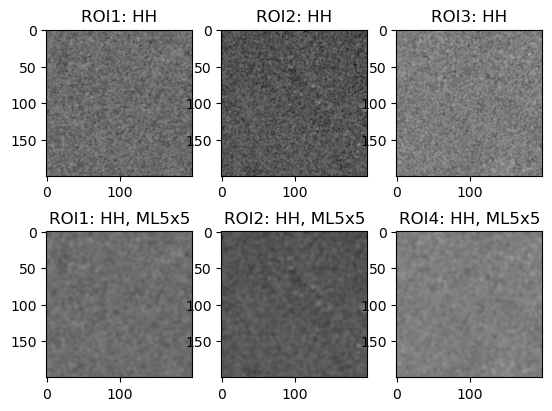

In [14]:
# display ROIs
fig, axes = plt.subplots(2,3)
axes = axes.ravel()
axes[0].imshow(HH_dB_roi1, cmap='gray', vmin=HH_min, vmax=HH_max)
axes[1].imshow(HH_dB_roi2, cmap='gray', vmin=HH_min, vmax=HH_max)
axes[2].imshow(HH_dB_roi3, cmap='gray', vmin=HH_min, vmax=HH_max)
axes[3].imshow(HH_ML_dB_roi1, cmap='gray', vmin=HH_min, vmax=HH_max)
axes[4].imshow(HH_ML_dB_roi2, cmap='gray', vmin=HH_min, vmax=HH_max)
axes[5].imshow(HH_ML_dB_roi3, cmap='gray', vmin=HH_min, vmax=HH_max)
axes[0].set_title(f'ROI1: HH')
axes[1].set_title(f'ROI2: HH')
axes[2].set_title(f'ROI3: HH')
axes[3].set_title(f'ROI1: HH, ML{window}x{window}')
axes[4].set_title(f'ROI2: HH, ML{window}x{window}')
# axes[5].set_title(f'ROI4: HH, ML{window}x{window}')

(-45.0, -10.0)

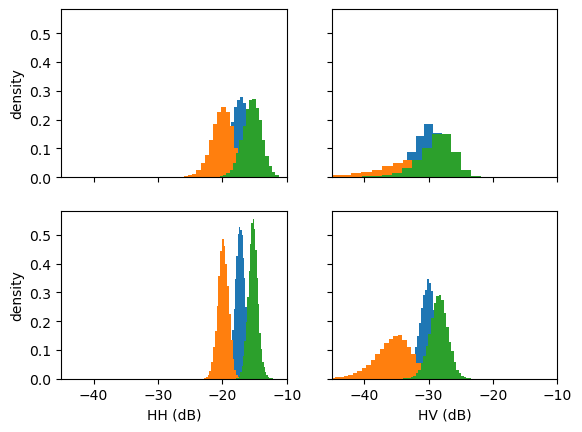

In [16]:
# number of bins for histogram
n_bins = 30

fig, axes = plt.subplots(2,2,sharex=True,sharey=True)
axes = axes.ravel()
axes[0].hist(HH_dB_roi1.flatten(), bins=n_bins, density=True)
axes[0].hist(HH_dB_roi2.flatten(), bins=n_bins, density=True)
axes[0].hist(HH_dB_roi3.flatten(), bins=n_bins, density=True)

axes[2].hist(HH_ML_dB_roi1.flatten(), bins=n_bins, density=True)
axes[2].hist(HH_ML_dB_roi2.flatten(), bins=n_bins, density=True)
axes[2].hist(HH_ML_dB_roi3.flatten(), bins=n_bins, density=True)

axes[1].hist(HV_dB_roi1.flatten(), bins=n_bins, density=True)
axes[1].hist(HV_dB_roi2.flatten(), bins=n_bins, density=True)
axes[1].hist(HV_dB_roi3.flatten(), bins=n_bins, density=True)

axes[3].hist(HV_ML_dB_roi1.flatten(), bins=n_bins, density=True)
axes[3].hist(HV_ML_dB_roi2.flatten(), bins=n_bins, density=True)
axes[3].hist(HV_ML_dB_roi3.flatten(), bins=n_bins, density=True)

axes[0].set_ylabel('density')
axes[2].set_ylabel('density')
axes[2].set_xlabel('HH (dB)')
axes[3].set_xlabel('HV (dB)')

axes[0].set_xlim([-45,-10])